In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-dark") 

Entre 2000 y 2009 hubo una conexión entre el incremento de consumo de queso per cápita y las muertes por enredarse con las sábanas.
https://www.tylervigen.com/spurious-correlations


In [3]:
df = pd.read_csv('queso.csv') 
df

,cheese_consumed,bedsheet_tanglings,year
0,29.8,327,2000
1,30.1,456,2001
2,30.5,509,2002
3,30.6,497,2003
4,31.3,596,2004
5,31.7,573,2005
6,32.6,661,2006
7,33.1,741,2007
8,32.7,809,2008
9,32.8,717,2009


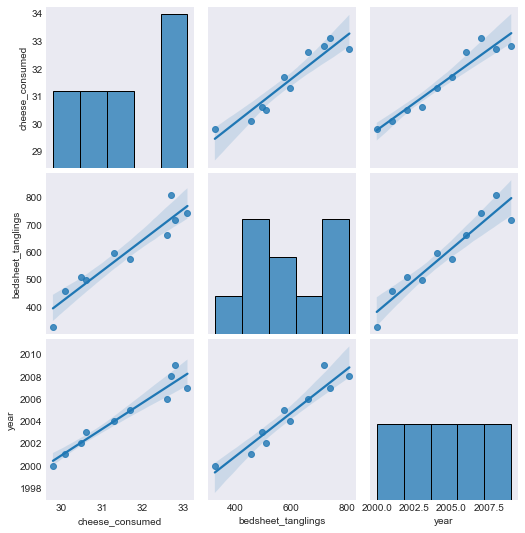

In [4]:
relacion = df.loc[:,['cheese_consumed','bedsheet_tanglings']] 
sns.pairplot(df, kind="reg");#establecer normalidad de los datos

Como se puede apreciar en el gráfico, las variables son cuantitativas, no siguen una distribución normal y poseen outlier, por lo que para determinar su correlación se debe usar el coeficiente de correlacion de Spearman

In [47]:
#Coef de correlacion de Spearman
relacion_corr = relacion.corr(method='spearman')
relacion_corr

,cheese_consumed,bedsheet_tanglings
cheese_consumed,1.000000,0.939394
bedsheet_tanglings,0.939394,1.000000


Ambas variables presentan una correlacion positiva moderada, pues el coef es mayor a 0,5 pero menor a 1.

In [48]:
#Nivel de Significancia de la correlación
#Hipotesis nula:No existe corrrelacion significativa entre las variables (P-valor > 0,05)
#hipotesis alternativa: Existe corrrelacion significativa entre las variables (P-valor < 0,05)
import pingouin as pg
corr = pg.pairwise_corr(relacion, method='spearman')
corr


,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,cheese_consumed,bedsheet_tanglings,spearman,two-sided,10,0.939394,"[0.76, 0.99]",0.000055,0.997046


No existe corrrelacion significativa entre las variables

Conclusiones:
- Existe una correlación positiva entre las variables cuenta total y propinas, lo que indica que mientras mayor sea el número de muertes por enrredarse en las sabanas, mayor es el consumo per capita de queso.
- Si bien existe una correlación esta es por pura casualidad, pues no existe un grado de significancia entre las variables.